# Chapter 4: Numpy basic (Arrays and vectorized computation)
**Overview:**
* The NumPy ndarray: A Multidimensional Array Object
* Universal Functions: Fast Element-wise Array Functions
* Data Processing Using Arrays
* File Input and Output with Arrays
* Linear Algebra
* Random Number Generation
* Example: Random Walks


NumPy, short for Numerical Python, is the fundamental package required for high performance scientific computing and data analysis. It is the foundation on which nearly all of the higher-level tools in this book are built. Here are some of the things it provides: 
> * ndarray, a fast and space-efficient multidimensional array providing vectorizedarithmetic operations and sophisticated broadcasting capabilities
> * Standard  mathematical  functions  for  fast  operations  on  entire  arrays  of  datawithout having to write loops
> * Tools for reading / writing array data to disk and working with memory-mappedfiles
> * Linear algebra, random number generation, and Fourier transform capabilities
> * Tools for integrating code written in C, C++, and Fortran

For most data analysis applications, the main areas of functionality I’ll focus on are:
* Fast vectorized array operations for data munging and cleaning, subsetting andfiltering, transformation, and any other kinds of computations
* Common array algorithms like sorting, unique, and set operations
* Efficient descriptive statistics and aggregating/summarizing data
* Data alignment and relational data manipulations for merging and joining togetherheterogeneous data sets
* Expressing conditional logic as array expressions instead of loops with if-elif-else branches
* Group-wise data manipulations

# The numpy array: A multidimesional array object
> One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large data sets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements:

Overview:
* Creating ndarrays
* Data type for ndarrays
* Operations between arrays and scalars
* Basic indexing and slicing 
* Boolean indexing
* Fancy indexing
* Transposing arrays and swapping axes

In [1]:
import numpy as np

In [2]:
data = np.random.randn(10)
data

array([-0.36997405, -0.90360864, -1.98873905, -2.08703027, -2.75687622,
       -1.77027362,  0.55121888, -1.15759216,  0.42148001,  0.29824826])

We can multil a ndarray with a number:

In [3]:
data * 10

array([ -3.69974046,  -9.03608635, -19.88739046, -20.87030268,
       -27.5687622 , -17.7027362 ,   5.51218881, -11.57592156,
         4.21480013,   2.9824826 ])

Or they can add to the other same size ndarray

In [4]:
data + data

array([-0.73994809, -1.80721727, -3.97747809, -4.17406054, -5.51375244,
       -3.54054724,  1.10243776, -2.31518431,  0.84296003,  0.59649652])

Each ndarray has a **shape**: the size of each dimension, and **dtype** describing data type of array:

In [5]:
data.shape

(10,)

In [6]:
data.dtype

dtype('float64')

## Creating ndarrays
* Using **numpy.array** funtion.

In [7]:
data = [1, 2, 3, 4.5, -9]
type(data)

list

In [8]:
arr = np.array(data)
type(arr)

numpy.ndarray

In [9]:
arr2 = np.array([1, 2, 3, 5])
arr2.dtype

dtype('int64')

* create multidimesional array:

In [10]:
data = [[1,2,3,4], [5,6,7,8]]
arr = np.array(data)
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [11]:
arr.shape

(2, 4)

In [12]:
arr.dtype

dtype('int64')

* create **zeros** or **ones** array

In [13]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
np.ones((3, 6))

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [15]:
type((3,6))

tuple

* create **empty** array:

In [16]:
np.empty((2,3,2))

array([[[  9.36473369e-317,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]],

       [[  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]]])

* arange is an array-valued version of the built-in Python range function

In [17]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

** Some functions to create array with numpy **

| Function | Description |
|----------|-------------|
| array| Convert input data (list, tuple, array, or other sequence type) to an ndarray either byinferring a dtype or explicitly specifying a dtype. Copies the input data by default.| 
| asarray | Convert input to ndarray, but do not copy if the input is already an ndarray |
| arange | Like the built-in range but returns an ndarray instead of a list |
| ones, ones_like | Produce an array of all 1’s with the given shape and dtype. ones_like takes another array and produces a ones array of the same shape and dtype |
| zeros, zeros_like | Like ones and ones_like but producing arrays of 0’s instead |
| empty, empty_like | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros |
| eye, identity | Create a square N x N identity matrix (1’s on the diagonal and 0’s elsewhere) |


In [18]:
arr = np.arange(6)
arr = arr.reshape((2, 3))    
np.ones_like(arr)

array([[1, 1, 1],
       [1, 1, 1]])

In [19]:
np.zeros_like(arr)

array([[0, 0, 0],
       [0, 0, 0]])

In [20]:
np.empty_like(arr)

array([[0, 0, 0],
       [0, 0, 0]])

In [21]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [22]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Data Types for ndarrays

> The data type or dtype is a special object containing the information the ndarray needs to interpret a chunk of memory as a particular type of data:

In [23]:
arr1 = np.array([1,2,3,4], dtype=np.int64)
arr1.dtype

dtype('int64')

In [24]:
arr2 = np.array([1,2,3,4], dtype=np.float64)
arr2

array([ 1.,  2.,  3.,  4.])

In [25]:
arr3 = np.array([1,2,3,4.8, 8589934592], dtype=np.int32)
arr3

array([1, 2, 3, 4, 0], dtype=int32)

| Type | Type Code | Description |
|------|-----------|-------------|
| int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types |
| int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types |
| int32, uint32 | i4, u4 | Signed and unsigned 32-bit integer types |
| int64, uint64 | i8, u8 | Signed and unsigned 32-bit integer types |
| float16 | f2 | Half-precision floating point |
| float32 | f4 or f | Standard single-precision floating point. Compatible with C float |
| float64, float128 | f8 or d | Standard double-precision floating point. Compatible with C doubleand Python float object |

> **convert** or **cast** one dtype to another using **astype** :

In [26]:
arr = np.array([1,2,3,4,5], dtype=np.int64)
arr

array([1, 2, 3, 4, 5])

In [27]:
float_arr = arr.astype(np.float64)
float_arr

array([ 1.,  2.,  3.,  4.,  5.])

float to int, then the decimal part will be truncated

In [28]:
arr = np.array([1.2, 1.4, -3.6])
arr.astype(np.int32)

array([ 1,  1, -3], dtype=int32)

string to number

In [29]:
numeric_strings = np.array(['1.2', '3.4', '-5.6'])
numeric_strings

array(['1.2', '3.4', '-5.6'], 
      dtype='|S4')

In [30]:
numeric_strings.astype(np.float64)

array([ 1.2,  3.4, -5.6])

## Operations between Arrays and Scalars
> Arrays are important because they enable you to express batch operations on dataw ithout writing any for loops. This is usually called vectorization

In [31]:
arr = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float64)
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [32]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [33]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Operations between scalar and array will propagate the value to each element.

In [34]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [35]:
arr ** 0.8

array([[ 1.        ,  1.74110113,  2.40822469],
       [ 3.03143313,  3.62389832,  4.19296271]])

Operations between differently sized arrays is called **broadcasting**

## Broadcasting
### Broadcasting with scalar
The simplest example of broadcasting occurs when combining a scalar value with an array:

In [36]:
arr = np.arange(5)
arr = arr * 4
arr

array([ 0,  4,  8, 12, 16])

Then we say 4 has been broadcast to all of other element in multiplication operation

### Broadcasting with array
Another example: Demean each column of an array by subtracting the column means.

In [37]:
arr = np.random.randn(4,3)
arr

array([[ 0.11142119,  0.42204934, -0.88071819],
       [-0.15711943,  1.22558202,  0.45952349],
       [-0.73812436,  1.27772128, -0.29781984],
       [-0.83093143,  1.44910082, -1.54978942]])

In [38]:
arr.mean(0)

array([-0.40368851,  1.09361336, -0.56720099])

In [39]:
demeaned = arr - arr.mean(0)
demeaned

array([[ 0.5151097 , -0.67156403, -0.3135172 ],
       [ 0.24656908,  0.13196866,  1.02672448],
       [-0.33443585,  0.18410791,  0.26938115],
       [-0.42724292,  0.35548745, -0.98258843]])

## Basic indexing and slicing
* One-dimensional arrays are simple

In [40]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
arr[5]

5

In [42]:
arr[5:9]

array([5, 6, 7, 8])

if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is
propagated (or *broadcasted henceforth*) to the entire selection

In [43]:
arr[5:8] = 12

In [44]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

** => Array is not the same with list, that means, every modification you do on the array, then it will change the original source. Array is mutable**

Array: mutable

In [45]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [46]:
arr_slice = arr[0:5]
arr_slice

array([0, 1, 2, 3, 4])

In [47]:
arr_slice[:4] = 1
arr

array([ 1,  1,  1,  1,  4, 12, 12, 12,  8,  9])

List: immutable

In [48]:
lists = [1,2,3,4,5,6,7,8]
lists

[1, 2, 3, 4, 5, 6, 7, 8]

In [49]:
lists_slice = lists[:4]
lists_slice

[1, 2, 3, 4]

In [50]:
lists_slice[3] = 10000
lists_slice

[1, 2, 3, 10000]

In [51]:
lists

[1, 2, 3, 4, 5, 6, 7, 8]

Why ndarray is mutable? 

Because numpy has been designed with large dataset, so if Numpy insisted on copying data then the performance and the memory problems will be occured

> To use a copy of origin array, use **copy** method.

In [52]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
arr_copy = arr[:5].copy()
arr_copy

array([0, 1, 2, 3, 4])

In [54]:
arr_copy[2] = 10000
arr_copy

array([    0,     1, 10000,     3,     4])

In [55]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Indexing with slices

one-demesional array:
    

In [56]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
arr[4:]

array([4, 5, 6, 7, 8, 9])

two-demensional array:

In [58]:
arr2d = np.random.randn(3,3)
arr2d[:2]

array([[ 0.01065284, -1.13388888,  1.44190379],
       [ 0.84504889,  2.49790069,  1.72583414]])

slice along axis 0, then slice along axis 1

In [59]:
arr2d[:2, 1:]

array([[-1.13388888,  1.44190379],
       [ 2.49790069,  1.72583414]])

## Boolean Indexing

In [60]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='|S4')

In [61]:
data = np.random.randn(7, 4)
data

array([[ -2.39792761e+00,  -1.22175895e-02,   5.68409119e-01,
          6.64418536e-01],
       [ -6.31597120e-02,  -8.99215179e-01,  -9.71639350e-02,
          6.30026785e-01],
       [ -4.60933345e-01,  -5.60131180e-01,  -1.26800949e+00,
          2.47336859e-01],
       [  1.77039525e+00,   2.49589557e-01,  -4.64036118e-01,
          3.27616842e-01],
       [  6.57019552e-01,  -9.53481376e-01,   1.57750248e+00,
         -9.49772572e-03],
       [ -5.77528819e-01,   4.66412429e-05,   1.00713573e+00,
          7.48064222e-01],
       [ -1.75397040e-01,   6.24977279e-01,   8.55955808e-01,
          9.73856588e-01]])

If we wanted to select all the rows with corresponding name 'Bob'.  Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized

In [62]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

This boolean array can be passed when indexing the array. 

The boolean array must be of the same length as the axis it’s indexing

In [63]:
data[names == 'Bob']

array([[-2.39792761, -0.01221759,  0.56840912,  0.66441854],
       [ 1.77039525,  0.24958956, -0.46403612,  0.32761684]])

In [64]:
data[names != 'Bob']

array([[ -6.31597120e-02,  -8.99215179e-01,  -9.71639350e-02,
          6.30026785e-01],
       [ -4.60933345e-01,  -5.60131180e-01,  -1.26800949e+00,
          2.47336859e-01],
       [  6.57019552e-01,  -9.53481376e-01,   1.57750248e+00,
         -9.49772572e-03],
       [ -5.77528819e-01,   4.66412429e-05,   1.00713573e+00,
          7.48064222e-01],
       [ -1.75397040e-01,   6.24977279e-01,   8.55955808e-01,
          9.73856588e-01]])

In [65]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [66]:
data[mask]

array([[-2.39792761, -0.01221759,  0.56840912,  0.66441854],
       [-0.46093334, -0.56013118, -1.26800949,  0.24733686],
       [ 1.77039525,  0.24958956, -0.46403612,  0.32761684],
       [ 0.65701955, -0.95348138,  1.57750248, -0.00949773]])

To set all of thenegative values in data to 0 we need only do:

In [67]:
data[data < 0] = 0
data

array([[  0.00000000e+00,   0.00000000e+00,   5.68409119e-01,
          6.64418536e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.30026785e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.47336859e-01],
       [  1.77039525e+00,   2.49589557e-01,   0.00000000e+00,
          3.27616842e-01],
       [  6.57019552e-01,   0.00000000e+00,   1.57750248e+00,
          0.00000000e+00],
       [  0.00000000e+00,   4.66412429e-05,   1.00713573e+00,
          7.48064222e-01],
       [  0.00000000e+00,   6.24977279e-01,   8.55955808e-01,
          9.73856588e-01]])

## Fancy Indexing
> Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays

In [68]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

To select a subset in order. Just pass a list or ndarray of integers 

In [69]:
arr[[3, 4, 5, 1]]

array([[ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 1.,  1.,  1.,  1.]])

To get desc. Add minus sign before integers

In [70]:
arr[[-1, -7]]

array([[ 7.,  7.,  7.,  7.],
       [ 1.,  1.,  1.,  1.]])

> Passing multiple index arrays does something slightly different

In [71]:
arr = np.arange(32).reshape(8,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [72]:
arr[[1,5,7,2], [0,3,1,2]]

array([ 4, 23, 29, 10])

To select along axis 0, then select in order axis 1, we can do:

In [73]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

**fancy indexing, unlike slicing, always copies the data into a new array**

## Transposing Arrays and Swapping Axes
> Arrays have the transpose method and alsothe special T attribute

In [74]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [75]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

# Universal Functions: Fast Element-wise Array Functions
> Universal Functions or ufunc, is a function apply to element in ndarrays

Unary functions

In [76]:
arr = np.arange(10)
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [77]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [78]:
np.exp?

Binary functions

In [79]:
x = np.random.randn(8)
x

array([-0.01126326, -0.11690638, -1.38373279, -1.7306571 ,  0.07921394,
        0.56166767, -0.90479312, -0.8312276 ])

In [80]:
y = np.random.randn(8)
y

array([-0.75612346, -0.34390339,  0.79658996,  0.89463055,  1.42396558,
       -0.5606745 ,  0.59011533,  0.23035866])

In [81]:
np.maximum(x, y)

array([-0.01126326, -0.11690638,  0.79658996,  0.89463055,  1.42396558,
        0.56166767,  0.59011533,  0.23035866])

# Data Processing Using Arrays
> Numpy arrays enables you to express many kind of processing data tasks without using while loops as pure python, and it faster than pure python from 2 or 3 times.

Example: We wants to evaluate function **sqrt(x^2 + y^2)**

In [82]:
points = np.arange(-5, 5, 0.01)
points

array([ -5.00000000e+00,  -4.99000000e+00,  -4.98000000e+00,
        -4.97000000e+00,  -4.96000000e+00,  -4.95000000e+00,
        -4.94000000e+00,  -4.93000000e+00,  -4.92000000e+00,
        -4.91000000e+00,  -4.90000000e+00,  -4.89000000e+00,
        -4.88000000e+00,  -4.87000000e+00,  -4.86000000e+00,
        -4.85000000e+00,  -4.84000000e+00,  -4.83000000e+00,
        -4.82000000e+00,  -4.81000000e+00,  -4.80000000e+00,
        -4.79000000e+00,  -4.78000000e+00,  -4.77000000e+00,
        -4.76000000e+00,  -4.75000000e+00,  -4.74000000e+00,
        -4.73000000e+00,  -4.72000000e+00,  -4.71000000e+00,
        -4.70000000e+00,  -4.69000000e+00,  -4.68000000e+00,
        -4.67000000e+00,  -4.66000000e+00,  -4.65000000e+00,
        -4.64000000e+00,  -4.63000000e+00,  -4.62000000e+00,
        -4.61000000e+00,  -4.60000000e+00,  -4.59000000e+00,
        -4.58000000e+00,  -4.57000000e+00,  -4.56000000e+00,
        -4.55000000e+00,  -4.54000000e+00,  -4.53000000e+00,
        -4.52000000e+00,

In [83]:
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [84]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [85]:
import matplotlib.pyplot as plt

In [86]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [87]:
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

In [88]:
plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()

In [89]:
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

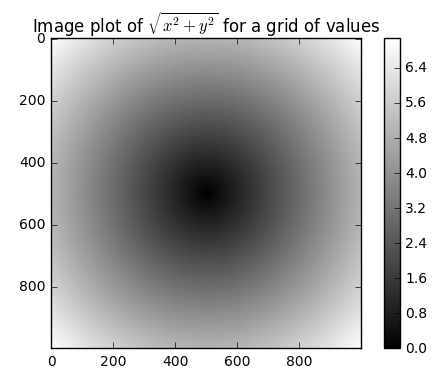

In [90]:
plt.show()

Overview:
* Expressing conditional logic as array operations
* Mathematical and statistical methods
* Method for boolean arrays
* Sorting 
* Unique and Oother set logic

## Expressing conditional logic as array operations

In [91]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we want to get xarr if cond is True, otherwise get yarr if cond is False

In [92]:
zip(xarr, yarr, cond)

[(1.1000000000000001, 2.1000000000000001, True),
 (1.2, 2.2000000000000002, False),
 (1.3, 2.2999999999999998, True),
 (1.3999999999999999, 2.3999999999999999, True),
 (1.5, 2.5, False)]

In [93]:
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

* **np.where(conditional, value1, value2)**

In [94]:
np.where(cond, xarr, yarr)

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

## Mathematical and Statistical Methods

> Static methods compute static about an entire array or data along an axis.

In [111]:
arr = np.random.randn(5, 4)
arr

array([[ 0.83383267,  0.53695816, -0.56737948,  0.41073742],
       [ 0.34142052, -0.05112575,  1.00383075, -0.50477155],
       [-0.83667674,  1.21262843,  2.19122281, -0.16811777],
       [-2.2797019 ,  0.12081213,  0.4405785 , -0.71977282],
       [-0.34378661,  0.33516468, -0.44665688, -0.67404501]])

* **np.mean**

In [112]:
arr.mean()

0.041757577352651669

In [113]:
np.mean(arr)

0.041757577352651669

* **np.sum**

In [114]:
arr.sum()

0.83515154705303341

If we want to compute along an axis we should pass parameters.

Example: Compute mean along axis 1 (Rows)

In [115]:
arr.mean(axis=1)

array([ 0.30353719,  0.19733849,  0.59976418, -0.60952103, -0.28233095])

Other methods do not aggregate, instead producing an array of intermediate arrays: **cumsum** and **cumprod**

In [127]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

* **np.cumsum**

In [128]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

In [129]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

* **np.cumprod**

In [131]:
np.cumprod(arr, axis =0)

array([[ 0,  1,  2],
       [ 0,  4, 10],
       [ 0, 28, 80]])

* **np.var, np.std **

In [138]:
np.var?

In [137]:
np.var(np.array([1,2,3]))


0.66666666666666663

In [136]:
np.std(np.array([3,2,1]))

0.81649658092772603

* **np.argmin, np.argmax**

In [143]:
np.argmax(np.array([3,4,5,12,7]))

3

## Methods for boolean

* Couting on true value

In [152]:
arr = np.random.randn(100)

In [153]:
(arr > 0).sum()

52

* **np.any**:  tests whether one or more values in an array is True

In [154]:
arr = np.array([True, False, False, True, True])

In [155]:
np.any(arr)

True

* **np.all**: checks if every value is True

In [156]:
np.all(arr)

False

## Sorting

* Sort 1D array

In [157]:
arr = np.random.randn(20)

In [159]:
arr.sort()
arr

array([-1.46086299, -1.35887544, -0.86886642, -0.85117505, -0.82092113,
       -0.66490356, -0.65874279, -0.56167911, -0.50105646, -0.22706295,
       -0.203383  ,  0.04467074,  0.20311487,  0.36608086,  0.42113725,
        0.65663683,  0.69549383,  0.94817283,  1.76355082,  2.28346586])

* sort 2D array along an axis (using minus sign to descending sort)

In [163]:
arr2d = np.random.randn(4,5)
arr2d

array([[ 0.03400495, -0.92323077, -1.0447754 ,  0.71217054, -0.51432408],
       [-0.91690169,  0.08817434,  1.23176354, -0.96384983,  0.33885803],
       [ 1.0632068 ,  0.57635101, -1.6868646 , -1.64218868, -0.17791121],
       [-0.16471189,  0.88259952,  0.10794463, -1.83180097,  0.13131274]])

In [166]:
np.sort(-arr2d, axis=0)

array([[-1.0632068 , -0.88259952, -1.23176354, -0.71217054, -0.33885803],
       [-0.03400495, -0.57635101, -0.10794463,  0.96384983, -0.13131274],
       [ 0.16471189, -0.08817434,  1.0447754 ,  1.64218868,  0.17791121],
       [ 0.91690169,  0.92323077,  1.6868646 ,  1.83180097,  0.51432408]])

## Unique and Other Set Logic
> Numpy has some basic operations for one-dimensional ndarrays.
 
* **np.unique** is a commonly used one.

In [95]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='|S4')

In [96]:
ints = np.array([1, 2, 3, 1, 2, 5, 6, 9, 1, 2, 9])
np.unique(ints)

array([1, 2, 3, 5, 6, 9])

pure python has a same functions with **np.unique** is **sorted**

In [97]:
sorted(set(names))

['Bob', 'Joe', 'Will']

* **intersect1d(x, y)**: Compute the sorted, common elements in x and y

In [98]:
np.intersect1d?

In [99]:
np.intersect1d([1, 2, 3, 4], [1, 3, 2, 8])

array([1, 2, 3])

* **union1d(x, y)**: Compute the sorted union of elements

In [100]:
np.union1d?

In [101]:
np.union1d([-2, 1, 0, 5], [3, 4, 5])

array([-2,  0,  1,  3,  4,  5])

* **in1d(x, y)**: Compute a boolean array indicating whether each element of x is contained in y

In [102]:
np.in1d?

In [103]:
%timeit(np.in1d([1, 1, 2, 3, -2, -1], [2, 3], assume_unique=False))

The slowest run took 6.19 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 26.5 µs per loop


In [104]:
%timeit(np.in1d([1, 1, 2, 3, -2, -1], [2, 3], assume_unique=True))

The slowest run took 5.45 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 27.2 µs per loop


* **setdiff1d(x, y)**: Find the set difference of two arrays.

In [105]:
np.setdiff1d?

In [106]:
np.setdiff1d([1,2,3,4,5,6,1,2], [3,4,5,6])

array([1, 2])

# File input and output with array
> Numpy can save and load data from disk (text or binary is okay)

## Storing Arrays on Disk in Binary Format

**np.save** and **np.load** are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension **.npy**.

In [5]:
arr = np.arange(10)
np.save('some_array', arr)

In [6]:
!ls

chapter4_note.ipynb  lab_cumsum  some_array.npy


In [7]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* using **np.savez** to zip file

In [21]:
np.savez('array_archive.npz', a=arr, b=arr)

In [22]:
arch = np.load('array_archive.npz')
arch.files

['a', 'b']

In [23]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Saving and Loading Text Files

* **np.loadtxt**

In [1]:
arr2d = np.loadtxt('array_ex2.gz', delimiter=',')
arr2d

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

* **np.savetxt**

In [31]:
np.savetxt('array_ex2.gz', arr2d, delimiter=',')

# Linear Algebra
> Linear algebra, like matrix multiplication, decompositions, determinants, and othersquare matrix math

* **np.dot**: multiply matries

In [5]:
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
y = np.array([[2,3], [4,5], [6,7]])
y

array([[2, 3],
       [4, 5],
       [6, 7]])

In [7]:
x.dot(y)

array([[28, 34],
       [64, 79]])

* **numpy.linalg**: has a standard set of matrix decompositions and things like inverse and determinant

In [10]:
from numpy.linalg import inv, qr

In [13]:
X = np.random.randn(5,5)
X

array([[  8.46770091e-01,  -3.29039354e-01,   1.73443234e+00,
         -1.51448658e+00,  -1.33471869e+00],
       [ -1.06522869e+00,   2.46129303e+00,  -1.15328064e+00,
         -2.80022043e+00,   2.36992085e+00],
       [ -1.34992332e+00,   7.60053119e-01,   7.47890473e-02,
          7.37807651e-01,   9.56749128e-01],
       [  6.27709002e-02,   2.09849814e+00,   6.86737402e-01,
          2.40635019e-03,  -3.31015301e-01],
       [ -1.25143401e+00,   4.81992982e-01,   9.23557243e-01,
         -9.24143177e-02,  -1.27338316e+00]])

In [15]:
mat = X.T.dot(X)
mat

array([[  5.24405198,  -4.39793186,   1.48354977,   0.82027092,
         -3.37346864],
       [ -4.39793186,  11.37992267,  -1.46614919,  -5.87255766,
          5.69102805],
       [  1.48354977,  -1.46614919,   5.66847144,   0.57414807,
         -6.37997159],
       [  0.82027092,  -5.87255766,   0.57414807,  10.68781037,  -3.7921081 ],
       [ -3.37346864,   5.69102805,  -6.37997159,  -3.7921081 ,
         10.04444352]])

In [16]:
inv(mat)

array([[ 0.33517481,  0.12070872,  0.06450273,  0.07776368,  0.11450698],
       [ 0.12070872,  0.24076496, -0.19896461,  0.0633448 , -0.19833566],
       [ 0.06450273, -0.19896461,  1.06105869,  0.1334039 ,  0.85871531],
       [ 0.07776368,  0.0633448 ,  0.1334039 ,  0.16376959,  0.1367902 ],
       [ 0.11450698, -0.19833566,  0.85871531,  0.1367902 ,  0.84746576]])

In [17]:
mat.dot(inv(mat))

array([[  1.00000000e+00,  -1.11022302e-16,   0.00000000e+00,
         -5.55111512e-17,   0.00000000e+00],
       [ -1.11022302e-16,   1.00000000e+00,   0.00000000e+00,
          1.11022302e-16,   0.00000000e+00],
       [  0.00000000e+00,  -2.22044605e-16,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.11022302e-16,  -1.11022302e-16,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00],
       [  2.22044605e-16,  -2.22044605e-16,   1.77635684e-15,
          0.00000000e+00,   1.00000000e+00]])

In [18]:
q, r = qr(mat)

In [20]:
r

array([[ -7.81638924,  12.70430667,  -5.70991099,  -6.72175926,  11.4093058 ],
       [  0.        ,  -7.51461003,  -0.17833332,   9.34566388,
         -3.11912369],
       [  0.        ,   0.        ,  -6.69931929,  -0.9997171 ,
          7.64016585],
       [  0.        ,   0.        ,   0.        ,  -5.52954636,
          0.90263315],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.80931194]])

# Random Number Generation

# Example: Random Walks

In [21]:
import random
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):    
    step = 1 if random.randint(0, 1) else -1    
    position += step    
    walk.append(position)